In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import time
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import seaborn as sns

### Global variables

In [4]:
from global_variables import *
from data_preparation import * 
from cost import * 
from cross_validation import *
from performances import * 


# Load the data

We map the 'b' and 's' labels to 0 and 1 respectively.

In [ ]:
X, Y = load_data()

In [ ]:
print(X.shape, Y.shape)

## Clean and standardize the features

### Counting the number of invalid datapoints per column

In [ ]:
invalids = np.count_nonzero(X == -999, axis=0)
print(invalids)

Therefore we get rid of columns [0,4,5,6,12,23,24,25,26,27,28]

In [ ]:
X_standardized = clean_and_standardize_features(X)
N = X_standardized.shape[1]

In [ ]:
correlation_matrix = np.corrcoef(X_standardized[:10000,:], rowvar=False)
suffix = time.time()
np.savetxt('correlation_matrix_' + str(suffix) + '.csv', correlation_matrix, fmt="%0.2f", delimiter=",", comments='')
correlation_heatmap(X_standardized)

## Methods from lab1 and lab2

We decided to use the sigmoid function: $$S(z) = \frac{1}{1 + e^{-z}}$$ <br />
to map the predicted values to probabilities of the event being a signal(1) rather than background(0) 

We use the cross-entropy cost function for loss computation: 
$$J(\theta) = -\frac{1}{N} * (y^T log(Xw) + (1-y)^T log(1-Xw))$$

In [ ]:
def grid_search(y, tx, w0, w1):
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            losses[i][j] = compute_loss(y, tx, np.array([w0[i], w1[j]]))
    return losses

### Additional methods

We label the results <0.5 to -1, and the rest to 1

## Trying the $L_2$ - regularization

In [ ]:
lambda_prime = lambda_1 * 2 * N
temp = np.linalg.inv(X_standardized.T@X_standardized + np.identity(N)*lambda_prime)
temp_2 = temp@X_standardized.T
w_L_2 = temp_2@Y

In [ ]:
Y_predicted = predict(X_standardized, w_L_2)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-entropy
evaluate_performance(label_results(Y), Y_labeled)

In [ ]:
find_best_threshold(Y_predicted, label_results(Y))

## Trying the ridge regression

In [ ]:
max_iters = 1000
gamma = 0.15
batch_size = 1

method = methods[4]
losses, w_ridge = gradient_descent(Y, X_standardized, np.ones(X_standardized.shape[1]), max_iters, gamma, method, lambda_1)
print(w_ridge)
plt.plot(losses)

In [ ]:
Y_predicted = predict(X_standardized, w_ridge)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-entropy
evaluate_performance(label_results(Y), Y_labeled)

In [ ]:
find_best_threshold(Y_predicted, label_results(Y))

## Trying gradient descent

In [ ]:
max_iters = 100
gamma = 0.01
batch_size = 1

method = methods[2]
losses, w = gradient_descent(Y, X_standardized, np.random.random(X_standardized.shape[1]), max_iters, gamma, method)
print(w)
plt.plot(losses)

In [ ]:
# compare different values of gamma for gradient descent
max_iters = 600
gamma = [0.5, 0.1, 0.15, 0.2, 0.3, 1]
batch_size = 1
whichLoss = 100
which = 100
losses = np.ndarray([len(gamma),1])
w = np.ndarray([len(gamma), X_standardized.shape[1]])
for i in range(len(gamma)):
    loss, wi = gradient_descent(Y, X_standardized, np.random.random(X_standardized.shape[1]), max_iters, gamma[i]) 
    plt.tight_layout()
    plt.subplot(int(str(32)+str(i+1)))
    plt.plot(loss)
    plt.xlabel("# of iterations")
    plt.ylabel("Cost")
    plt.title("Gamma = " + str(gamma[i]))
    print(loss[-1])
    if(loss[-1] < whichLoss):
        whichLoss = loss[-1]
        which = i
    losses[i] = loss[-1]
    w[i,:] = wi

print("smallest cost:" + str(losses[which]) + "at gamma=" + str(gamma[which]))


In [ ]:
try:
    Y_predicted = predict(X_standardized, w)
except:
    Y_predicted = predict(X_standardized, w[which,:])
Y_labeled = label_results(Y_predicted, 0.46)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-entropy

In [ ]:
evaluate_performance(label_results(Y), Y_labeled)

In [ ]:
find_best_threshold(Y_predicted, label_results(Y))

# Comparing cost functions

least-squares
[0.08812818]
least-squares-GD
[0.10088678]
least-squares-SGD
[6.1749275e-06]
ridge-regression
[0.13939763]
log
[0.62556437]
regularized-log
[0.6711941]


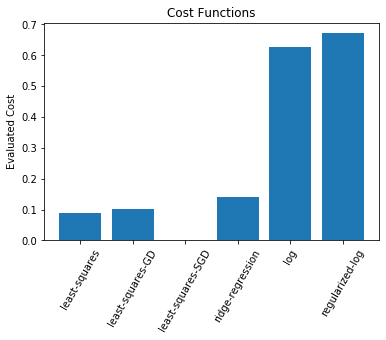

In [163]:
# call up the different methods to find minimize the error to the dataset
# store the corresponding losses and compare them in a table
# need to define y, tx, initial_w, batch_size, max_iters, gamma, lambda_r
#x, y = load_data()
#tx = clean_and_standardize_features(x)

# initialize parameters
#initial_w = np.ones(tx.shape[1])
initial_w = np.random.rand(tx.shape[1])
max_iters = 100
gamma = 0.01
batch_size = 1
lambda_ = 2

methods2compare = ['least-squares', 'least-squares-GD', 'least-squares-SGD', 'ridge-regression', 'log', 'regularized-log'] 
losses = np.ndarray([len(methods2compare),1])
weights = np.ndarray([len(methods2compare),tx.shape[1]])

for ind, method_i in enumerate(methods2compare):
    print(method_i)
    weights[ind,:], losses[ind] = ML_methods(y, tx, method_i, initial_w, batch_size, max_iters, gamma, lambda_)
    print(losses[ind])

# Bring cost to list for plotting 
barY = list()
for i in range(len(losses)):
    barY.append(losses[i,0].tolist())

# Create bar plot with labels
plt.bar(np.arange(len(losses)), barY)
plt.xticks(np.arange(len(losses)), methods2compare, rotation='60')
plt.ylabel("Evaluated Cost")
plt.title("Cost Functions")
plt.show()


# Oversampling the signal class

In [ ]:
all_data = np.column_stack([Y, X_standardized])
distrib = np.bincount(all_data[:,0].astype(int))
prob = 1/distrib[all_data[:, 0].astype(int)].astype(float)
prob /= prob.sum()
all_data = all_data[np.random.choice(np.arange(len(all_data)), size=np.count_nonzero(distrib)*distrib.max(), p=prob)]
print(all_data.shape)

### Rerunning the gradient descent with oversampled data

In [ ]:
max_iters = 500
gamma = 0.15
batch_size = 1

losses, w = gradient_descent(all_data[:,0], all_data[:,1:], np.ones(X_standardized.shape[1]), max_iters, gamma, method)
print(w)
print(losses[-1])
plt.plot(losses)

In [ ]:
Y_predicted = predict(X_standardized, w)
Y_labeled = label_results(Y_predicted)
print(performance(Y_labeled, label_results(Y)))
# 0.735 for mse
#0.74038 for cross-enthropy
evaluate_performance(label_results(Y), Y_labeled)

## Load test data

In [ ]:
test_data = np.genfromtxt(testing_data, delimiter=',', skip_header=1)
test_X = test_data[:, 2:]
test_X_standardized = clean_and_standardize_features(test_X)

In [ ]:
test_predictions = label_results(predict(test_X_standardized, w))
test_ids = range(350000,918238)

In [ ]:
test_results = np.column_stack([test_ids, test_predictions])
suffix = time.time()
np.savetxt('submission' + str(suffix) + '.csv', test_results, fmt="%d", delimiter=",", header="Id,Prediction", comments='')